In [444]:
def rename(df, rate):
    df.columns=['date', rate, 'nan']
    df['date']=pd.to_datetime(df['date'])
    df[rate]=df[rate].astype(float)
    return  df[['date',rate]]

import pandas as pd
import numpy as np

df2=rename(pd.read_csv("us_2year.csv", encoding='big5'), '2year')
df5=rename(pd.read_csv("us_5year.csv", encoding='big5'), '5year')
df10=rename(pd.read_csv("us_10year.csv", encoding='big5'), '10year')
df20=rename(pd.read_csv("us_20year.csv", encoding='big5'), '20year')
df30=rename(pd.read_csv("us_30year.csv", encoding='big5'), '30year')

dfs=pd.merge(pd.merge(df2, df5, on='date', how='left'), \
             pd.merge(df10, df20, on='date', how='left'))
dfs=pd.merge(dfs, df30, on='date', how='left')

dfs.set_index('date', inplace=True)
dfs

,2year,5year,10year,20year,30year
date,,,,,
2000-03-14,6.506,6.566,6.368,6.43,6.168
2000-03-15,6.455,6.490,6.287,6.39,6.093
2000-03-16,6.489,6.495,6.289,6.37,6.080
2000-03-17,6.471,6.452,6.242,6.33,6.045
2000-03-20,6.488,6.444,6.194,6.31,5.998
...,...,...,...,...,...
2023-08-14,4.960,4.360,4.190,4.46,4.290
2023-08-15,4.920,4.360,4.210,4.49,4.320
2023-08-16,4.970,4.420,4.280,4.55,4.380


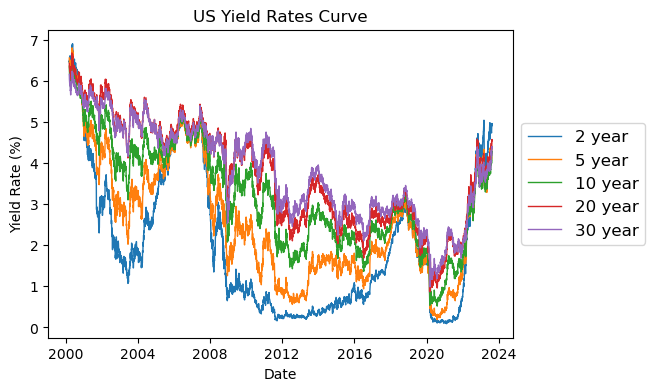

In [445]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(dfs['2year'], label='2 year', linewidth=1, color='C0')
ax.plot(dfs['5year'], label='5 year', linewidth=1, color='C1')
ax.plot(dfs['10year'], label='10 year', linewidth=1, color='C2')
ax.plot(dfs['20year'], label='20 year', linewidth=1, color='C3')
ax.plot(dfs['30year'], label='30 year', linewidth=1, color='C4')

ax.set_title("US Yield Rates Curve")
ax.set_xlabel('Date')
ax.set_ylabel('Yield Rate (%)')

ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("us_yield_curve.png" ,bbox_inches='tight')
plt.show()

C:\Users\minku\AppData\Local\Temp\ipykernel_920\2209138123.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dfs.index[::label_num].strftime('%Y-%m-%d'), rotation=0, ha='right')


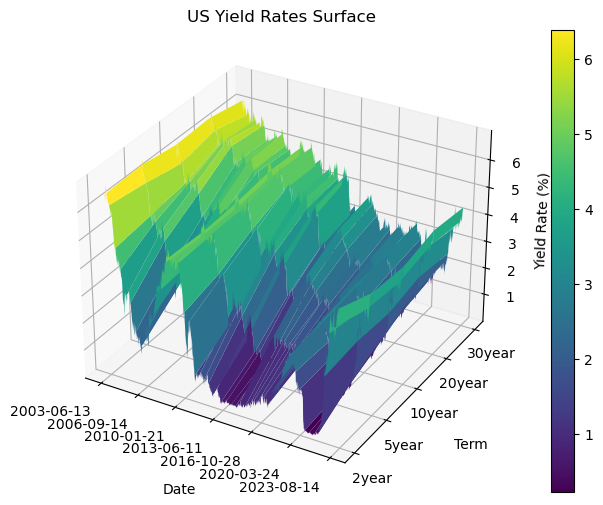

In [446]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

X=np.arange(0, len(dfs.index), 1)
Y=np.arange(0, len(dfs.columns), 1)
X_numeric, Y_numeric = np.meshgrid(X, Y)

Z = dfs.values.T 

surface = ax.plot_surface(X_numeric, Y_numeric, Z, cmap='viridis')

ax.set_xlabel('Date', rotation=0, labelpad=15)
ax.set_ylabel('Term', rotation=0, labelpad=15)
ax.set_zlabel('Yield Rate (%)', rotation=45)
ax.set_title('US Yield Rates Surface')

ax.set_yticks(Y)
ax.set_yticklabels(dfs.columns)

label_num=len(dfs.index)//(len(ax.get_xticklabels())-2)
ax.set_xticklabels(dfs.index[::label_num].strftime('%Y-%m-%d'), rotation=0, ha='right')

fig.colorbar(surface, ax=ax)

plt.savefig("us_yield_surface.png" ,bbox_inches='tight')
plt.show()